<a href="https://colab.research.google.com/github/JamshedAli18/CNN-models/blob/main/Facial_Expressions_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
#!/bin/bash
!kaggle datasets download msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
  0% 0.00/60.3M [00:00<?, ?B/s]
100% 60.3M/60.3M [00:00<00:00, 1.37GB/s]


In [3]:
import zipfile

zip_ref = zipfile.ZipFile('/content/fer2013.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [4]:
import tensorflow
from tensorflow import keras

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150, 150)
)

# generators
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150, 150)
)



Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [6]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, Dropout
from keras.models import Sequential
from keras.applications import VGG16

In [7]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
model = Sequential()

model.add(conv_base)

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7,activation='softmax'))

In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,845,895 (64.26 MB)

 Trainable params: 16,845,895 (64.26 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
conv_base.trainable = False

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,845,895 (64.26 MB)

 Trainable params: 2,131,207 (8.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_ds,validation_data=validation_ds,epochs=15)

Epoch 1/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 135s 151ms/step - accuracy: 0.3098 - loss: 2.5584 - val_accuracy: 0.4578 - val_loss: 1.4254
Epoch 2/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 140s 148ms/step - accuracy: 0.4394 - loss: 1.4778 - val_accuracy: 0.5020 - val_loss: 1.3401
Epoch 3/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 142s 148ms/step - accuracy: 0.4945 - loss: 1.3503 - val_accuracy: 0.5131 - val_loss: 1.3110
Epoch 4/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 142s 148ms/step - accuracy: 0.5281 - loss: 1.2711 - val_accuracy: 0.5194 - val_loss: 1.3065
Epoch 5/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 142s 148ms/step - accuracy: 0.5576 - loss: 1.1943 - val_accuracy: 0.5267 - val_loss: 1.3268
Epoch 6/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 124s 128ms/step - accuracy: 0.5830 - loss: 1.1152 - val_accuracy: 0.5302 - val_loss: 1.3682
Epoch 7/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 133s 148ms/step - accuracy: 0.6147 - loss: 1.0454 - val_accuracy: 0.5343 - val_loss: 1.3774
Epoch 8/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 142s 148ms/step - accuracy: 0.6341 -

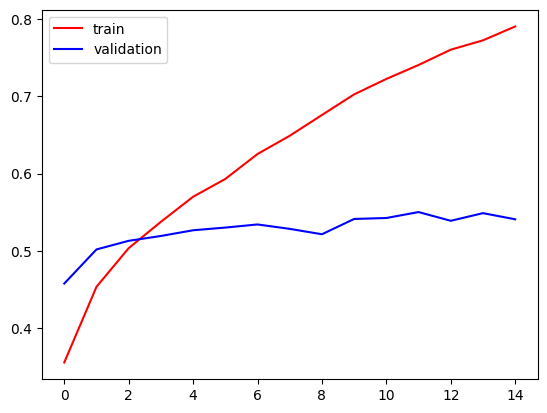

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

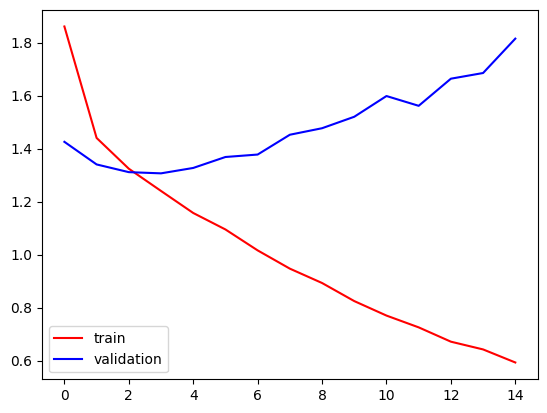

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

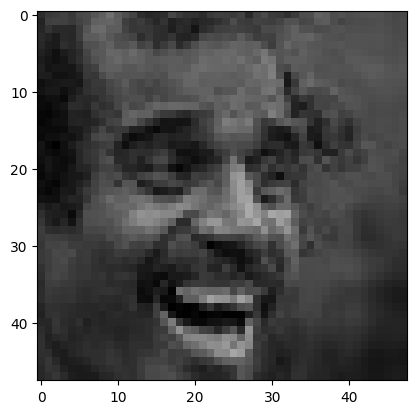

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


# Read the image
img = cv2.imread('/content/download.jpeg')

# Convert BGR to RGB for correct color display with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)



In [25]:

# Resize to match model input
resized_img = cv2.resize(img_rgb, (150,150))

# Normalize (if required by model)
resized_img = resized_img / 255.0

# Reshape to (1, height, width, channels)
input_img = resized_img.reshape(1, 150, 150, 3)

# Make prediction
prediction = model.predict(input_img)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


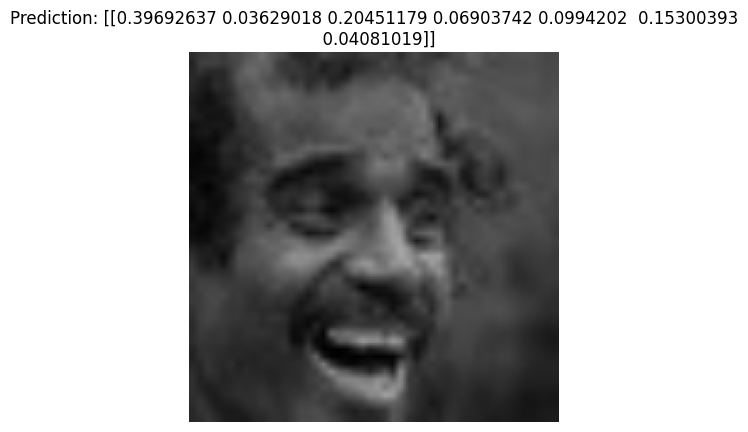

In [26]:
# Show image with prediction
plt.imshow(resized_img)
plt.title(f'Prediction: {prediction}')
plt.axis('off')
plt.show()
